In [ ]:
# Test mlflow
import mlflow

mlflow.set_tracking_uri('http://ec2-54-173-92-7.compute-1.amazonaws.com:5000/')

with mlflow.start_run():
    mlflow.log_param("param1", 10)
    mlflow.log_metric("metric1", 0.95)

🏃 View run charming-pig-797 at: http://ec2-54-173-92-7.compute-1.amazonaws.com:5000/#/experiments/0/runs/343a487084c04b1e8b87240791bb3390
🧪 View experiment at: http://ec2-54-173-92-7.compute-1.amazonaws.com:5000/#/experiments/0


In [ ]:
import numpy as np
import pandas as pd
import mlflow.sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_predict, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('C:/test/youtube_comment_sentiment_analysis/Artifacts/youtubecomment_preprocessing.csv')
df.head()

,Comment,Sentiment
0,let not forget apple pay 2014 required brand n...,0
1,nz 50 retailer don’t even contactless credit c...,-1
2,forever acknowledge channel help lesson idea e...,1
3,whenever go place doesn’t take apple pay doesn...,-1
4,apple pay convenient secure easy use used kore...,1


In [ ]:
# Vectorize the comments using Bag of Words (CountVectorizer)
vectorizer = CountVectorizer(max_features=1000)  # Bag of Words model with a limit of 1000 features

In [9]:
X = vectorizer.fit_transform(df['Comment']).toarray()
y = df['Sentiment']  # Assuming 'sentiment' is the target variable (0 or 1 for binary classification)

In [10]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [11]:
y

0        0
1       -1
2        1
3       -1
4        1
        ..
15828    0
15829    1
15830    1
15831    1
15832    1
Name: Sentiment, Length: 15833, dtype: int64

In [ ]:
# Set up the MLflow tracking server
mlflow.set_tracking_uri('http://ec2-54-173-92-7.compute-1.amazonaws.com:5000/')

In [13]:
# Set or create an experiment
mlflow.set_experiment("Exp1: RandomForest Baseline")

<Experiment: artifact_location='s3://youtubecommentmlflow/126865168639022889', creation_time=1741867401239, experiment_id='126865168639022889', last_update_time=1741867401239, lifecycle_stage='active', name='Exp1: RandomForest Baseline', tags={}>

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
2025/03/13 18:38:23 WARNING mlflow.utils.environment: E

🏃 View run RandomForest_Baseline_TrainTestSplit at: http://ec2-54-173-92-7.compute-1.amazonaws.com:5000/#/experiments/126865168639022889/runs/4160a44d40ca49c4ab7655c0f3ff07fc
🧪 View experiment at: http://ec2-54-173-92-7.compute-1.amazonaws.com:5000/#/experiments/126865168639022889
Accuracy: 0.6520366277233975


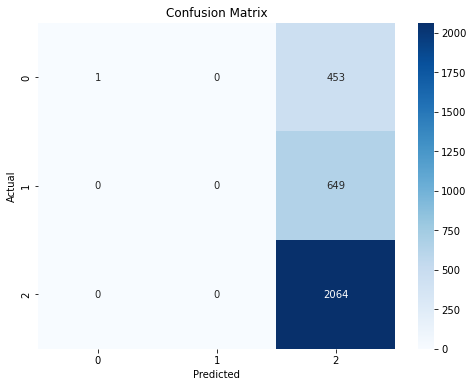

In [ ]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define and train a Random Forest baseline model using a simple train-test split
with mlflow.start_run() as run:
    # Log a description for the run
    mlflow.set_tag("mlflow.runName", "RandomForest_Baseline_TrainTestSplit")
    mlflow.set_tag("experiment_type", "baseline")
    mlflow.set_tag("model_type", "RandomForestClassifier")

    # Add a description
    mlflow.set_tag("description", "Baseline RandomForest model for sentiment analysis using Bag of Words (BoW) with a simple train-test split")

    # Log parameters for the vectorizer
    mlflow.log_param("vectorizer_type", "CountVectorizer")
    mlflow.log_param("vectorizer_max_features", vectorizer.max_features)

    # Log Random Forest parameters
    n_estimators = 200
    max_depth = 15

    mlflow.log_param("n_estimators", n_estimators)
    mlflow.log_param("max_depth", max_depth)

    # Initialize and train the model
    model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Log metrics for each class and accuracy
    accuracy = accuracy_score(y_test, y_pred)
    mlflow.log_metric("accuracy", accuracy)

    classification_rep = classification_report(y_test, y_pred, output_dict=True)

    for label, metrics in classification_rep.items():
        if isinstance(metrics, dict):  # For precision, recall, f1-score, etc.
            for metric, value in metrics.items():
                mlflow.log_metric(f"{label}_{metric}", value)

    # Confusion matrix plot
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")

    # Save and log the confusion matrix plot
    plt.savefig("C:/test/youtube_comment_sentiment_analysis/Artifacts/confusion_matrix.png")
    mlflow.log_artifact("C:/test/youtube_comment_sentiment_analysis/Artifacts/confusion_matrix.png")

    # Log the Random Forest model
    mlflow.sklearn.log_model(model, "random_forest_model")

    # Optionally log the dataset itself (if it's small enough)
    df.to_csv("C:/test/youtube_comment_sentiment_analysis/Artifacts/dataset.csv", index=False)
    mlflow.log_artifact("C:/test/youtube_comment_sentiment_analysis/Artifacts/dataset.csv")

# Display final accuracy
print(f"Accuracy: {accuracy}")

In [17]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       1.00      0.00      0.00       454
           0       0.00      0.00      0.00       649
           1       0.65      1.00      0.79      2064

    accuracy                           0.65      3167
   macro avg       0.55      0.33      0.26      3167
weighted avg       0.57      0.65      0.52      3167



c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
